# Overview
Calculating enrichment for secreted proteins and transmembrane proteins among groups of inparalogs. Plots are also created (**Fig. 1** of the paper)

# Charging libraries

In [1]:
import pandas as pd
from collections import defaultdict
from scipy.stats import fisher_exact
import tqdm

# Calculating enrichment

In [2]:
inparalogs_group_composition = pd.read_csv('../results/misc/inparalogs_group_composition_final.tsv', sep = '\t')

In [3]:
secretome_and_transmembranome = pd.read_csv('../results/secretome_and_transmembranome_predictions/secretome_and_transmembranome_predictions.tsv', sep = '\t')

In [4]:
secretome_and_transmembranome.head()

,ID,SecretomeP,SignalP,TargetP,TMHMM,Secretome,Transmembranome,Mitochondrial
0,mk4.009236.01,Y,N,N,N,Y,N,N
1,mk4.009297.01,Y,N,N,N,Y,N,N
2,mk4.000131.10,Y,N,N,N,Y,N,N
3,mk4.012811.00,Y,N,N,N,Y,N,N
4,mk4.003400.00,Y,N,N,N,Y,N,N


In [5]:
id2category = {row['ID']: 'Secretome' if row['Secretome'] == 'Y' else 'Transmembranome' if row['Transmembranome'] == 'Y' else 'Other' for ID, row in secretome_and_transmembranome.iterrows()}

In [6]:
# Create DataFrame
inparalogs_group_composition_df = pd.DataFrame(inparalogs_group_composition)

# Parse comma-separated proteins and create a list of proteins for each row
inparalogs_group_composition_df['Proteins'] = inparalogs_group_composition_df['Genes'].apply(lambda x: x.split(', '))

# Create a new column indicating whether each protein is tagged as Secretome, Transmembranome, or neither
def get_protein_tag(proteins):
    tags = []
    for protein in proteins:
        tag = id2category.get(protein, 'Other')
        if tag:
            tags.append(tag)
        else:
            tags.append('Other')
    return tags

inparalogs_group_composition_df['Protein_Tag'] = inparalogs_group_composition_df['Proteins'].apply(get_protein_tag)

# Create a defaultdict to store the counts of inparalog proteins tagged as Secretome and Transmembranome
inparalog_counts = defaultdict(lambda: defaultdict(int))

# Iterate over each row in the DataFrame
for index, row in tqdm.tqdm(inparalogs_group_composition_df.iterrows()):
    species = row['Species']
    for protein_tag in row['Protein_Tag']:
        inparalog_counts[species][protein_tag] += 1

19962it [00:01, 12376.19it/s]


In [7]:
[get_protein_tag(x) for x in inparalogs_group_composition_df['Proteins'].to_list()[0:10]]

[['Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other'],
 ['Other', 'Other', 'Other'],
 ['Other', 'Other', 'Other'],
 ['Other', 'Other'],
 ['Other', 'Other'],
 ['Other', 'Other'],
 ['Other', 'Other', 'Other', 'Other'],
 ['Other', 'Other'],
 ['Transmembranome', 'Transmembranome'],
 ['Secretome', 'Transmembranome']]

In [8]:
inparalogs_group_composition_df

,Genes,monophyletic_group_code,Species,Proteins,Protein_Tag
0,maker-E.canG7_contigs_7517-pred_gff_protein2ge...,F118360_ECAN_G1,E. canadensis,[maker-E.canG7_contigs_7517-pred_gff_protein2g...,"[Other, Other, Other, Other, Other, Other, Oth..."
1,"BOX15_Mlig000519g2, BOX15_Mlig012743g1, BOX15_...",F110097_MLIG_G1,M. lignano,"[BOX15_Mlig000519g2, BOX15_Mlig012743g1, BOX15...","[Other, Other, Other]"
2,"BOX15_Mlig008585g3, BOX15_Mlig008585g1, BOX15_...",F37570_MLIG_G1,M. lignano,"[BOX15_Mlig008585g3, BOX15_Mlig008585g1, BOX15...","[Other, Other, Other]"
3,"TREG1_125180.1, TREG1_142720.1",F37570_TREG_G1,T. regenti,"[TREG1_125180.1, TREG1_142720.1]","[Other, Other]"
4,"BOX15_Mlig018154g2, BOX15_Mlig018154g1",F84689_MLIG_G1,M. lignano,"[BOX15_Mlig018154g2, BOX15_Mlig018154g1]","[Other, Other]"
...,...,...,...,...,...
19957,"BOX15_Mlig029986g3, BOX15_Mlig029986g1, BOX15_...",F102512_MLIG_G1,M. lignano,"[BOX15_Mlig029986g3, BOX15_Mlig029986g1, BOX15...","[Other, Other, Other]"
19958,"BOX15_Mlig034494g2, BOX15_Mlig034494g1",F120776_MLIG_G1,M. lignano,"[BOX15_Mlig034494g2, BOX15_Mlig034494g1]","[Other, Other]"
19959,"BOX15_Mlig016203g1, BOX15_Mlig016203g3, BOX15_...",F69485_MLIG_G1,M. lignano,"[BOX15_Mlig016203g1, BOX15_Mlig016203g3, BOX15...","[Other, Other, Other]"
19960,"mk4.015305.01, mk4.007648.02",F114214_SMED_G1,S. mediterranea,"[mk4.015305.01, mk4.007648.02]","[Other, Other]"


In [9]:
inparalogs_group_composition_df

,Genes,monophyletic_group_code,Species,Proteins,Protein_Tag
0,maker-E.canG7_contigs_7517-pred_gff_protein2ge...,F118360_ECAN_G1,E. canadensis,[maker-E.canG7_contigs_7517-pred_gff_protein2g...,"[Other, Other, Other, Other, Other, Other, Oth..."
1,"BOX15_Mlig000519g2, BOX15_Mlig012743g1, BOX15_...",F110097_MLIG_G1,M. lignano,"[BOX15_Mlig000519g2, BOX15_Mlig012743g1, BOX15...","[Other, Other, Other]"
2,"BOX15_Mlig008585g3, BOX15_Mlig008585g1, BOX15_...",F37570_MLIG_G1,M. lignano,"[BOX15_Mlig008585g3, BOX15_Mlig008585g1, BOX15...","[Other, Other, Other]"
3,"TREG1_125180.1, TREG1_142720.1",F37570_TREG_G1,T. regenti,"[TREG1_125180.1, TREG1_142720.1]","[Other, Other]"
4,"BOX15_Mlig018154g2, BOX15_Mlig018154g1",F84689_MLIG_G1,M. lignano,"[BOX15_Mlig018154g2, BOX15_Mlig018154g1]","[Other, Other]"
...,...,...,...,...,...
19957,"BOX15_Mlig029986g3, BOX15_Mlig029986g1, BOX15_...",F102512_MLIG_G1,M. lignano,"[BOX15_Mlig029986g3, BOX15_Mlig029986g1, BOX15...","[Other, Other, Other]"
19958,"BOX15_Mlig034494g2, BOX15_Mlig034494g1",F120776_MLIG_G1,M. lignano,"[BOX15_Mlig034494g2, BOX15_Mlig034494g1]","[Other, Other]"
19959,"BOX15_Mlig016203g1, BOX15_Mlig016203g3, BOX15_...",F69485_MLIG_G1,M. lignano,"[BOX15_Mlig016203g1, BOX15_Mlig016203g3, BOX15...","[Other, Other, Other]"
19960,"mk4.015305.01, mk4.007648.02",F114214_SMED_G1,S. mediterranea,"[mk4.015305.01, mk4.007648.02]","[Other, Other]"


In [10]:
code2species = {
    'Tsol': 'T. solium',
    'Mlig': 'M. lignano',
    'Treg': 'T. regenti',
    'Hmic': 'H. microstoma',
    'Tsag': 'T. saginata',
    'Hdim': 'H. diminuta',
    'Fhep': 'F. hepatica',
    'Smat': 'S. mattheei',
    'Scur': 'S. curassoni',
    'Emul': 'E. multilocularis',
    'Sman': 'S. mansoni',
    'Tasi': 'T. asiatica',
    'Smar': 'S. margrebowiei',
    'Csin': 'C. sinensis',
    'Egra': 'E. granulosus',
    'Mcor': 'M. corti',
    'Shae': 'S. haematobium',
    'Sjap': 'S. japonicum',
    'Ecan': 'E. canadensis',
    'Smed': 'S. mediterranea',
    'Oviv': 'O. viverrini'
}

In [11]:
original2new = pd.read_csv('../results/misc/gene_code_correspondance.tsv', sep = '\t')

In [12]:
original2new = original2new.assign(Species = lambda df: [code2species[x.split('.')[0]] for x in df['New Name'].to_list()])

In [13]:
id2species = {row['Original Name']: row['Species'] for index,row in original2new.iterrows()}

In [14]:
secretome_and_transmembranome = secretome_and_transmembranome.assign(Species = lambda df: [id2species[x] for x in df['ID'].to_list()]) # tengo que conseguirle una columna Species

In [15]:
inparalogs_group_composition_df

,Genes,monophyletic_group_code,Species,Proteins,Protein_Tag
0,maker-E.canG7_contigs_7517-pred_gff_protein2ge...,F118360_ECAN_G1,E. canadensis,[maker-E.canG7_contigs_7517-pred_gff_protein2g...,"[Other, Other, Other, Other, Other, Other, Oth..."
1,"BOX15_Mlig000519g2, BOX15_Mlig012743g1, BOX15_...",F110097_MLIG_G1,M. lignano,"[BOX15_Mlig000519g2, BOX15_Mlig012743g1, BOX15...","[Other, Other, Other]"
2,"BOX15_Mlig008585g3, BOX15_Mlig008585g1, BOX15_...",F37570_MLIG_G1,M. lignano,"[BOX15_Mlig008585g3, BOX15_Mlig008585g1, BOX15...","[Other, Other, Other]"
3,"TREG1_125180.1, TREG1_142720.1",F37570_TREG_G1,T. regenti,"[TREG1_125180.1, TREG1_142720.1]","[Other, Other]"
4,"BOX15_Mlig018154g2, BOX15_Mlig018154g1",F84689_MLIG_G1,M. lignano,"[BOX15_Mlig018154g2, BOX15_Mlig018154g1]","[Other, Other]"
...,...,...,...,...,...
19957,"BOX15_Mlig029986g3, BOX15_Mlig029986g1, BOX15_...",F102512_MLIG_G1,M. lignano,"[BOX15_Mlig029986g3, BOX15_Mlig029986g1, BOX15...","[Other, Other, Other]"
19958,"BOX15_Mlig034494g2, BOX15_Mlig034494g1",F120776_MLIG_G1,M. lignano,"[BOX15_Mlig034494g2, BOX15_Mlig034494g1]","[Other, Other]"
19959,"BOX15_Mlig016203g1, BOX15_Mlig016203g3, BOX15_...",F69485_MLIG_G1,M. lignano,"[BOX15_Mlig016203g1, BOX15_Mlig016203g3, BOX15...","[Other, Other, Other]"
19960,"mk4.015305.01, mk4.007648.02",F114214_SMED_G1,S. mediterranea,"[mk4.015305.01, mk4.007648.02]","[Other, Other]"


In [16]:
secretome_and_transmembranome.query("ID.str.contains('Mlig')") # falta lignano!

,ID,SecretomeP,SignalP,TargetP,TMHMM,Secretome,Transmembranome,Mitochondrial,Species
49563,BOX15_Mlig032220g1,Y,Y,N,N,Y,N,N,M. lignano
49564,BOX15_Mlig032334g1,Y,Y,N,Y,N,Y,N,M. lignano
49565,BOX15_Mlig030651g1,Y,N,N,N,Y,N,N,M. lignano
49566,BOX15_Mlig031291g1,Y,N,N,N,Y,N,N,M. lignano
49567,BOX15_Mlig031851g1,Y,Y,N,Y,N,Y,N,M. lignano
...,...,...,...,...,...,...,...,...,...
300624,BOX15_Mlig006538g1,N,N,N,N,N,N,N,M. lignano
300625,BOX15_Mlig007016g1,N,N,N,Y,N,Y,N,M. lignano
300626,BOX15_Mlig008054g5,N,N,N,Y,N,Y,N,M. lignano
300627,BOX15_Mlig007598g1,N,Y,N,Y,N,Y,N,M. lignano


In [17]:
# Lists to store the results
results_secretome = []
results_transmembranome = []

# Initialize dictionaries to store counts for inparalogs and non-inparalogs
inparalog_counts = defaultdict(lambda: defaultdict(int))
non_inparalog_counts = defaultdict(lambda: defaultdict(int))

# Iterate over each row in the DataFrame to populate inparalog counts
for index, row in tqdm.tqdm(inparalogs_group_composition_df.iterrows()):
    species = row['Species']
    for protein_tag in row['Protein_Tag']:
        if protein_tag == 'Secretome':
            inparalog_counts[species]['Secretome'] += 1
        elif protein_tag == 'Transmembranome':
            inparalog_counts[species]['Transmembranome'] += 1
        else:
            inparalog_counts[species]['Other'] += 1

# Calculate total counts for non-inparalogs from secretome_and_transmembranome
for index, row in tqdm.tqdm(secretome_and_transmembranome.iterrows()):
    ID = row['ID']
    species = row['Species']
    inparalogs_list = [ID for genes in inparalogs_group_composition_df.query("Species == @species").Genes.to_list() for ID in genes.split(', ')]
    if ID not in inparalogs_list:
        if row['Secretome'] == 'Y':
            non_inparalog_counts[species]['Secretome'] += 1
        elif row['Transmembranome'] == 'Y':
            non_inparalog_counts[species]['Transmembranome'] += 1
        else:
            non_inparalog_counts[species]['Other'] += 1

19962it [00:01, 12430.00it/s]
300629it [13:33, 369.45it/s]


In [18]:
inparalog_counts

defaultdict(<function __main__.<lambda>()>,
            {'E. canadensis': defaultdict(int,
                         {'Other': 392,
                          'Secretome': 55,
                          'Transmembranome': 50}),
             'M. lignano': defaultdict(int,
                         {'Other': 26781,
                          'Transmembranome': 8901,
                          'Secretome': 3146}),
             'T. regenti': defaultdict(int,
                         {'Other': 2330,
                          'Secretome': 378,
                          'Transmembranome': 551}),
             'H. microstoma': defaultdict(int,
                         {'Other': 671,
                          'Transmembranome': 198,
                          'Secretome': 135}),
             'T. saginata': defaultdict(int,
                         {'Other': 483,
                          'Transmembranome': 92,
                          'Secretome': 98}),
             'H. diminuta': defaultdict(int,
   

In [19]:
import scipy.stats as stats
import pandas as pd

In [20]:
df = inparalogs_group_composition_df

In [21]:
import pandas as pd
from scipy import stats
from statsmodels.stats.multitest import fdrcorrection

In [22]:
import pandas as pd
from scipy import stats
from statsmodels.stats.multitest import fdrcorrection

secretome_results = {}
transmembranome_results = {}

# Perform Fisher exact test for each organism
for species, tags_count in inparalog_counts.items():
    inparalog_secretome = tags_count['Secretome']
    inparalog_transmembranome = tags_count['Transmembranome']
    
    # Total counts for secretome and transmembranome for this species
    total_secretome = len(df[(df['Species'] == species) & df['Protein_Tag'].apply(lambda x: 'Secretome' in x)])
    total_transmembranome = len(df[(df['Species'] == species) & df['Protein_Tag'].apply(lambda x: 'Transmembranome' in x)])
    
    # Total inparalogs for this species
    total_inparalogs = len(df[(df['Species'] == species)])

    # Corrected calculation for Secretome contingency table
    contingency_table_secretome = [
        [inparalog_counts[species]['Secretome'], inparalog_counts[species]['Other'] + inparalog_counts[species]['Transmembranome']],  # Inparalog Secretome vs. Non-Inparalog Secretome
        [non_inparalog_counts[species]['Secretome'], non_inparalog_counts[species]['Other'] + non_inparalog_counts[species]['Transmembranome']]  # Inparalog Non-Secretome vs. Non-Inparalog Non-Secretome (Other Homologs)
    ]
    
    # Corrected calculation for Transmembranome contingency table
    contingency_table_transmembranome = [
        [inparalog_counts[species]['Transmembranome'], inparalog_counts[species]['Other'] + inparalog_counts[species]['Secretome']],  # Inparalog Transmembranome vs. Non-Inparalog Transmembranome
        [non_inparalog_counts[species]['Transmembranome'], non_inparalog_counts[species]['Other'] + non_inparalog_counts[species]['Secretome']]  # Inparalog Non-Transmembranome vs. Non-Inparalog Non-Transmembranome (Other Homologs)
    ]
    
    # Perform Fisher exact test for Secretome
    oddsratio_secretome, p_secretome = stats.fisher_exact(contingency_table_secretome)

    # Perform Fisher exact test for Transmembranome
    oddsratio_transmembranome, p_transmembranome = stats.fisher_exact(contingency_table_transmembranome)

    # Store the counts and p-values in the results dictionary
    secretome_results[species] = {'Inparalog_Secretome_Count': inparalog_counts[species]['Secretome'],
                                  'Inparalog_Non-Secretome_Count': inparalog_counts[species]['Other'] + inparalog_counts[species]['Transmembranome'],
                                  'Other_Homologs_Secretome_Count': non_inparalog_counts[species]['Secretome'],
                                  'Other_Homologs_Non-Secretome_Count': non_inparalog_counts[species]['Other'] + non_inparalog_counts[species]['Transmembranome'],
                                  'Secretome_p_value': p_secretome}
    transmembranome_results[species] = {'Inparalog_Transmembranome_Count': tags_count['Transmembranome'],
                                        'Inparalog_Non-Transmembranome_Count': total_inparalogs - tags_count['Transmembranome'],
                                        'Other_Homologs_Transmembranome_Count': non_inparalog_counts[species]['Transmembranome'],
                                        'Other_Homologs_Non-Transmembranome_Count': non_inparalog_counts[species]['Other'],
                                        'Transmembranome_p_value': p_transmembranome}

# Convert the results dictionaries into DataFrames
secretome_results_df = pd.DataFrame.from_dict(secretome_results, orient='index')
transmembranome_results_df = pd.DataFrame.from_dict(transmembranome_results, orient='index')

# Correct p-values for multiple testing using FDR
secretome_results_df['Secretome_FDR'] = fdrcorrection(secretome_results_df['Secretome_p_value'])[1]
transmembranome_results_df['Transmembranome_FDR'] = fdrcorrection(transmembranome_results_df['Transmembranome_p_value'])[1]


In [23]:
species = 'S. mansoni'

In [24]:
inparalog_counts[species]['Secretome']

127

In [25]:
inparalog_counts[species]['Other'] + inparalog_counts[species]['Transmembranome']

470

In [26]:
inparalog_counts[species]

defaultdict(int, {'Other': 304, 'Secretome': 127, 'Transmembranome': 166})

In [27]:
secretome_results_df

,Inparalog_Secretome_Count,Inparalog_Non-Secretome_Count,Other_Homologs_Secretome_Count,Other_Homologs_Non-Secretome_Count,Secretome_p_value,Secretome_FDR
E. canadensis,55,442,805,9710,7.828465e-03,1.095985e-02
M. lignano,3146,35682,965,9173,6.582283e-06,1.382279e-05
T. regenti,378,2881,821,10355,8.386762e-14,2.935367e-13
H. microstoma,135,869,572,8521,1.560093e-14,6.552391e-14
T. saginata,98,575,1280,11165,7.592463e-04,1.226475e-03
H. diminuta,392,2631,909,11219,4.786241e-20,2.512777e-19
T. asiatica,118,856,1347,10964,2.643855e-01,3.084497e-01
S. mediterranea,547,8678,1081,18034,3.544142e-01,3.917210e-01
S. mattheei,35,443,564,9702,1.015622e-01,1.254592e-01
S. curassoni,31,556,521,8932,9.255650e-01,9.255650e-01


In [28]:
[y for x in inparalogs_group_composition_df.query("Species == 'S. mansoni'").Protein_Tag.to_list() for y in x].count('Secretome')

127

In [29]:
[y for x in inparalogs_group_composition_df.query("Species == 'S. mansoni'").Protein_Tag.to_list() for y in x].count('Transmembranome')

166

In [30]:
[y for x in inparalogs_group_composition_df.query("Species == 'S. mansoni'").Protein_Tag.to_list() for y in x].count('Other')

304

In [31]:
127+166+304

597

In [32]:
len(list([y for x in inparalogs_group_composition_df.query("Species == 'S. mansoni'").Protein_Tag.to_list() for y in x]))

597

Vemos que el total de inparalogos de S. mansoni deberia ser 597 entonces... cierra?

In [33]:
166+304

470

Ah, porque el punto es que algo puede ser Transmembranome y Other, no? Y ahi lo estoy contando dos veces...

No, por como esta escrito esto eso no puede pasar

In [34]:
secretome_results_df = secretome_results_df.assign(Significative = lambda df: ['***' if x < 0.05 else '-' for x in df['Secretome_FDR'].to_list()])

In [35]:
secretome_results_df

,Inparalog_Secretome_Count,Inparalog_Non-Secretome_Count,Other_Homologs_Secretome_Count,Other_Homologs_Non-Secretome_Count,Secretome_p_value,Secretome_FDR,Significative
E. canadensis,55,442,805,9710,7.828465e-03,1.095985e-02,***
M. lignano,3146,35682,965,9173,6.582283e-06,1.382279e-05,***
T. regenti,378,2881,821,10355,8.386762e-14,2.935367e-13,***
H. microstoma,135,869,572,8521,1.560093e-14,6.552391e-14,***
T. saginata,98,575,1280,11165,7.592463e-04,1.226475e-03,***
H. diminuta,392,2631,909,11219,4.786241e-20,2.512777e-19,***
T. asiatica,118,856,1347,10964,2.643855e-01,3.084497e-01,-
S. mediterranea,547,8678,1081,18034,3.544142e-01,3.917210e-01,-
S. mattheei,35,443,564,9702,1.015622e-01,1.254592e-01,-
S. curassoni,31,556,521,8932,9.255650e-01,9.255650e-01,-


In [36]:
transmembranome_results_df = transmembranome_results_df.assign(Significative = lambda df: ['***' if x < 0.05 else '-' for x in df['Transmembranome_FDR'].to_list()])

In [37]:
transmembranome_results_df

,Inparalog_Transmembranome_Count,Inparalog_Non-Transmembranome_Count,Other_Homologs_Transmembranome_Count,Other_Homologs_Non-Transmembranome_Count,Transmembranome_p_value,Transmembranome_FDR,Significative
E. canadensis,50,98,2226,7484,1.519359e-10,1.063551e-09,***
M. lignano,8901,3602,2163,7010,6.405047e-04,1.120883e-03,***
T. regenti,551,299,2381,7974,2.898407e-08,1.521664e-07,***
H. microstoma,198,185,1796,6725,1.000000e+00,1.000000e+00,-
T. saginata,92,211,2441,8724,8.942039e-05,1.877828e-04,***
H. diminuta,354,361,2000,9219,2.715672e-11,2.851456e-10,***
T. asiatica,147,278,2439,8525,2.525591e-04,4.821583e-04,***
S. mediterranea,1018,1427,3173,14861,1.586958e-36,3.332612e-35,***
S. mattheei,57,113,2211,7491,1.129163e-07,4.742485e-07,***
S. curassoni,80,134,2079,6853,6.107076e-07,2.137477e-06,***


___
Hay que arreglar la parte que hay un menos, es raro eso ahi
- checkear tambien que este sacando bien las cuentas esto...
___

In [38]:
# Convert results to DataFrames
df_secretome = pd.DataFrame(results_secretome)
df_transmembranome = pd.DataFrame(results_transmembranome)

# Plotting results

In [45]:
import pandas as pd
from plotnine import *

In [46]:
secretome_df = secretome_results_df.reset_index().rename({'index': 'Species'}, axis = 1)
transmembranome_df = transmembranome_results_df.reset_index().rename({'index': 'Species'}, axis = 1)

In [47]:
secretome_df

,Species,Inparalog_Secretome_Count,Inparalog_Non-Secretome_Count,Other_Homologs_Secretome_Count,Other_Homologs_Non-Secretome_Count,Secretome_p_value,Secretome_FDR,Significative
0,E. canadensis,55,442,805,9710,7.828465e-03,1.095985e-02,***
1,M. lignano,3146,35682,965,9173,6.582283e-06,1.382279e-05,***
2,T. regenti,378,2881,821,10355,8.386762e-14,2.935367e-13,***
3,H. microstoma,135,869,572,8521,1.560093e-14,6.552391e-14,***
4,T. saginata,98,575,1280,11165,7.592463e-04,1.226475e-03,***
5,H. diminuta,392,2631,909,11219,4.786241e-20,2.512777e-19,***
6,T. asiatica,118,856,1347,10964,2.643855e-01,3.084497e-01,-
7,S. mediterranea,547,8678,1081,18034,3.544142e-01,3.917210e-01,-
8,S. mattheei,35,443,564,9702,1.015622e-01,1.254592e-01,-
9,S. curassoni,31,556,521,8932,9.255650e-01,9.255650e-01,-


In [48]:
# Calculate percentages for secretome inparalogs and other homologs
secretome_df['Inparalog_Secretome_Percentage'] = (secretome_df['Inparalog_Secretome_Count'] / 
                                                  (secretome_df['Inparalog_Secretome_Count'] + secretome_df['Inparalog_Non-Secretome_Count'])) * 100

secretome_df['Other_Homologs_Secretome_Percentage'] = (secretome_df['Other_Homologs_Secretome_Count'] / 
                                                       (secretome_df['Other_Homologs_Secretome_Count'] + secretome_df['Other_Homologs_Non-Secretome_Count'])) * 100

# Calculate percentages for transmembranome inparalogs and other homologs
transmembranome_df['Inparalog_Transmembranome_Percentage'] = (transmembranome_df['Inparalog_Transmembranome_Count'] / 
                                                              (transmembranome_df['Inparalog_Transmembranome_Count'] + transmembranome_df['Inparalog_Non-Transmembranome_Count'])) * 100

transmembranome_df['Other_Homologs_Transmembranome_Percentage'] = (transmembranome_df['Other_Homologs_Transmembranome_Count'] / 
                                                                   (transmembranome_df['Other_Homologs_Transmembranome_Count'] + transmembranome_df['Other_Homologs_Non-Transmembranome_Count'])) * 100


In [49]:
secretome_df['Protein_Type'] = 'Secretome'
transmembranome_df['Protein_Type'] = 'Transmembranome'

In [50]:
# For secretome_df, keep necessary columns and melt
secretome_melted = secretome_df.melt(id_vars=['Species', 'Significative'],
                                     value_vars=['Inparalog_Secretome_Percentage', 'Other_Homologs_Secretome_Percentage'],
                                     var_name='Group', value_name='Percentage')

secretome_melted['Protein_Type'] = 'Secretome'

# For transmembranome_df, keep necessary columns and melt
transmembranome_melted = transmembranome_df.melt(id_vars=['Species', 'Significative'],
                                                 value_vars=['Inparalog_Transmembranome_Percentage', 'Other_Homologs_Transmembranome_Percentage'],
                                                 var_name='Group', value_name='Percentage')

transmembranome_melted['Protein_Type'] = 'Transmembranome'


In [51]:
# Concatenate melted DataFrames
melted_df = pd.concat([secretome_melted, transmembranome_melted], ignore_index=True)

# Refine 'Group' names for clarity
group_name_mapping = {
    'Inparalog_Secretome_Percentage': 'Inparalog Secretome',
    'Other_Homologs_Secretome_Percentage': 'Other Homologs Secretome',
    'Inparalog_Transmembranome_Percentage': 'Inparalog Transmembranome',
    'Other_Homologs_Transmembranome_Percentage': 'Other Homologs Transmembranome'
}
melted_df['Group'] = melted_df['Group'].map(group_name_mapping)

# Calculate species order based on the mean percentage across all groups if needed
# Example for calculating species order (optional)
melted_df['species_order'] = melted_df.groupby('Species')['Percentage'].transform('mean')

# Calculate Label_Y position if needed for labeling
melted_df['Label_Y'] = melted_df['Percentage']  # Adjust this based on how you want to position your labels


In [52]:
# Define the specific order of species
species_order = [
    "H. diminuta", "H. microstoma", "H. nana", "M. corti", 
    "E. granulosus", "E. multilocularis", "E. canadensis", 
    "T. solium", "T. asiatica", "T. saginata", "C. sinensis", 
    "O. viverrini", "F. hepatica", "T. regenti", "S. curassoni", 
    "S. haematobium", "S. japonicum", "S. mansoni", "S. margrebowiei", 
    "S. mattheei", "M. lignano", "S. mediterranea"
]

species_order.reverse()

# Map the specified order to a column for sorting
melted_df['species_rank'] = melted_df['Species'].apply(lambda x: species_order.index(x))

# Sort melted_df by this new 'species_rank' column
melted_df = melted_df.sort_values(by='species_rank')


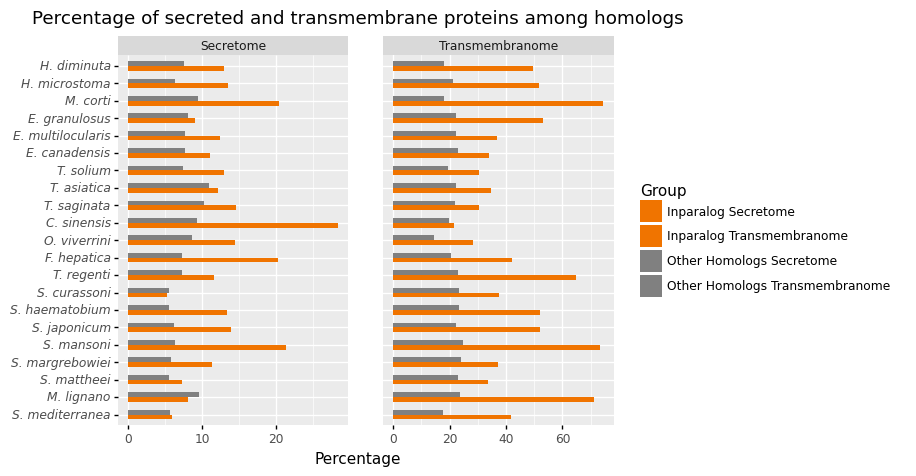

<ggplot: (8746633643142)>

In [53]:
from plotnine import *

plot = (ggplot(melted_df, aes(x='reorder(Species, species_rank)', y='Percentage', fill='Group'))
        + geom_bar(aes(width=.55), position=position_dodge(width=0.55), stat='identity')
        #+ geom_text(aes(y='Label_Y', label='Significative', group='Group'), position=position_dodge(width=0.5), va='center', size=6,
        #            data=melted_df[melted_df['Significative'] == '***'])
        + scale_fill_manual(values={'Inparalog Secretome': '#F07400', 'Other Homologs Secretome': 'gray',
                                    'Inparalog Transmembranome': '#F07400', 'Other Homologs Transmembranome': 'gray'})
        + facet_wrap('~Protein_Type', scales='free_x', nrow=1)
        + labs(title='Percentage of secreted and transmembrane proteins among homologs', x='', y='Percentage')
        + theme(axis_text_y=element_text(style='italic'),
                #axis_ticks_major_x=element_blank(),
                subplots_adjust={'wspace': 0.15},
                strip_text_x=element_text(rotation=0))
        + coord_flip()
)

plot


In [54]:
plot.save("../results/figures/percentage_of_secreted_and_transmembrane_inparalogs.svg", width=9, height=9, units='in')

/home/mauricio/anaconda3/envs/r-environment/lib/python3.6/site-packages/plotnine/ggplot.py:721: PlotnineWarning: Saving 9 x 9 in image.
/home/mauricio/anaconda3/envs/r-environment/lib/python3.6/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: ../results/figures/percentage_of_secreted_and_transmembrane_inparalogs.svg
